In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import healpy as hp

# 1M

In [7]:
NSIDE = 512
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

Approximate resolution at NSIDE 512 is 0.11 deg
3145728


In [9]:
original_mat_path = 'frequency_1M/B_1Mhz.txt'
reconstructed_mat_path = 'period50_1M/sum_50_fromB_divdldmdn.txt'
original_image_1m = np.loadtxt(original_mat_path)
reconstructed_image = np.loadtxt(reconstructed_mat_path)

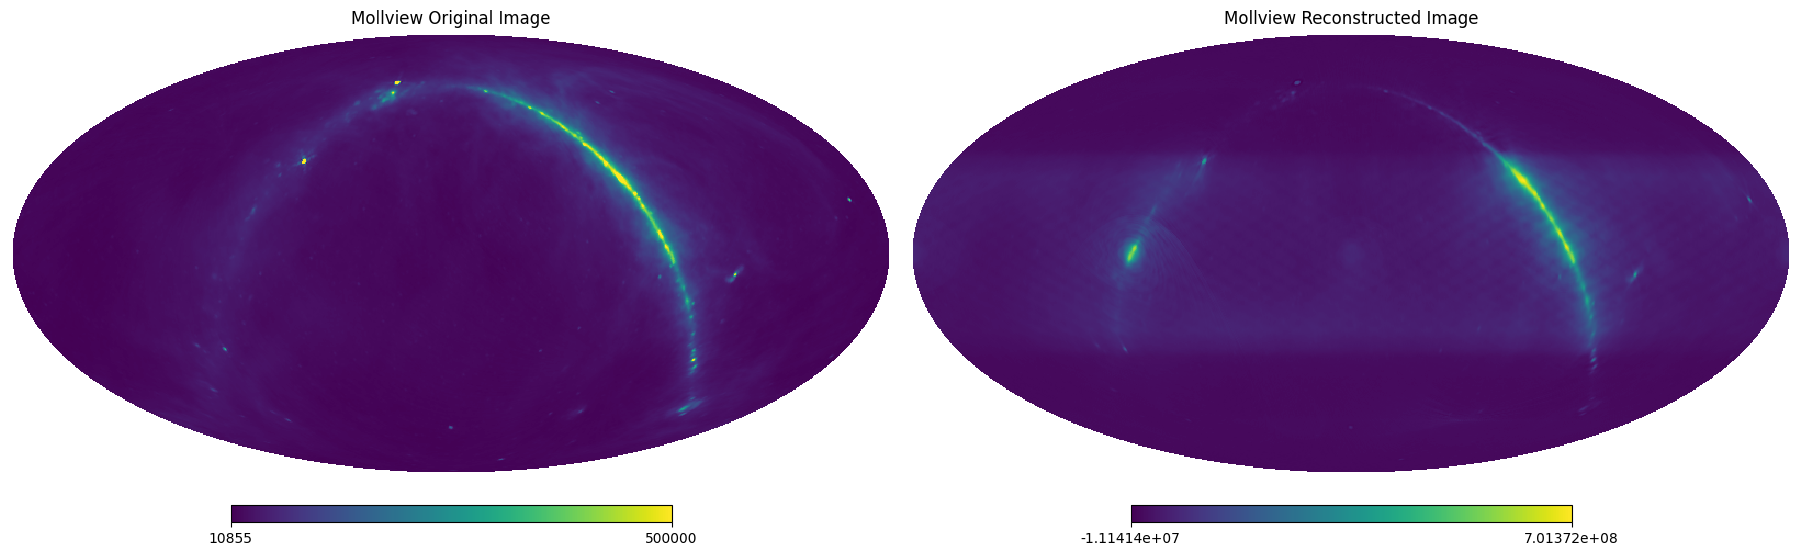

In [11]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_image_1m,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
    # min=11222,
)
axs[0].axis('off')

hp.mollview(
    reconstructed_image,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis'
)
axs[1].axis('off')

plt.show()

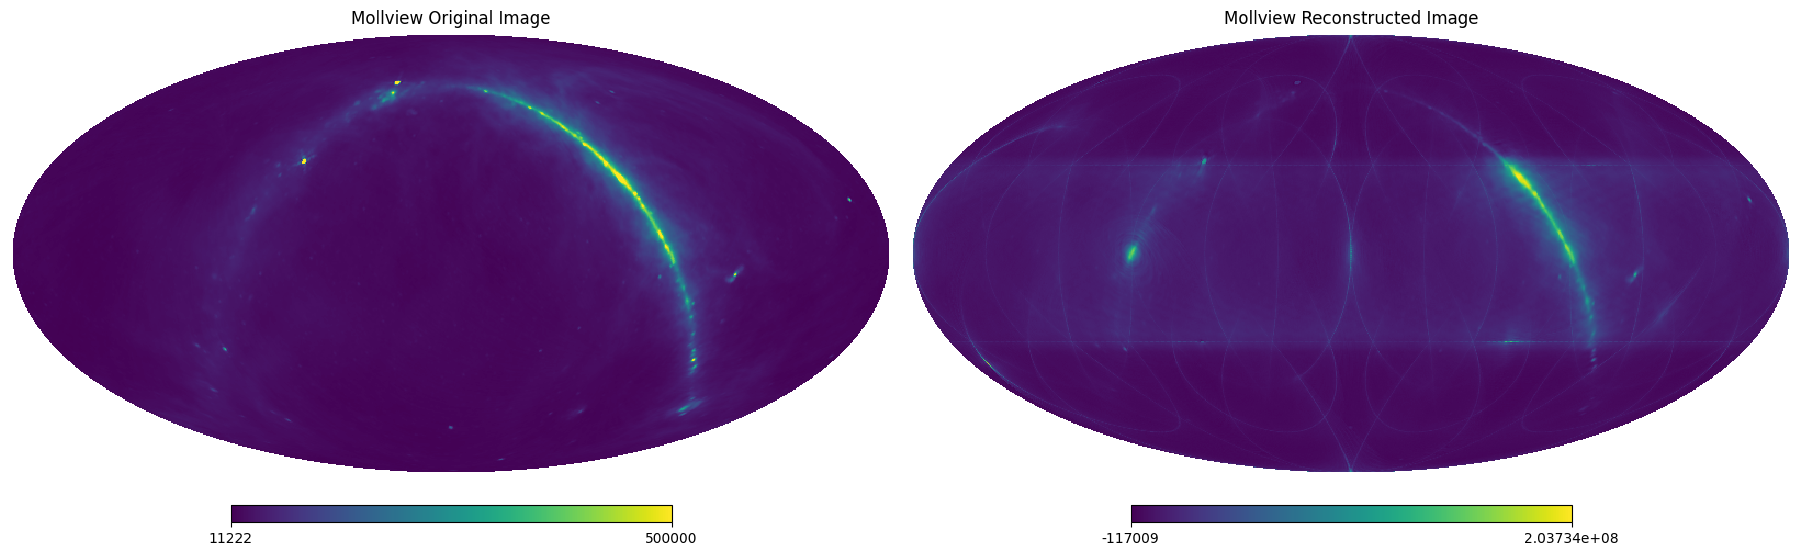

In [12]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_image,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
    min=11222,
)
axs[0].axis('off')

hp.mollview(
    reconstructed_image,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis'
)
axs[1].axis('off')

plt.show()

/tmp/ipykernel_1116216/1834148801.py:2: RuntimeWarning: invalid value encountered in log10
  reconstructed_image_log = np.log10(reconstructed_image)


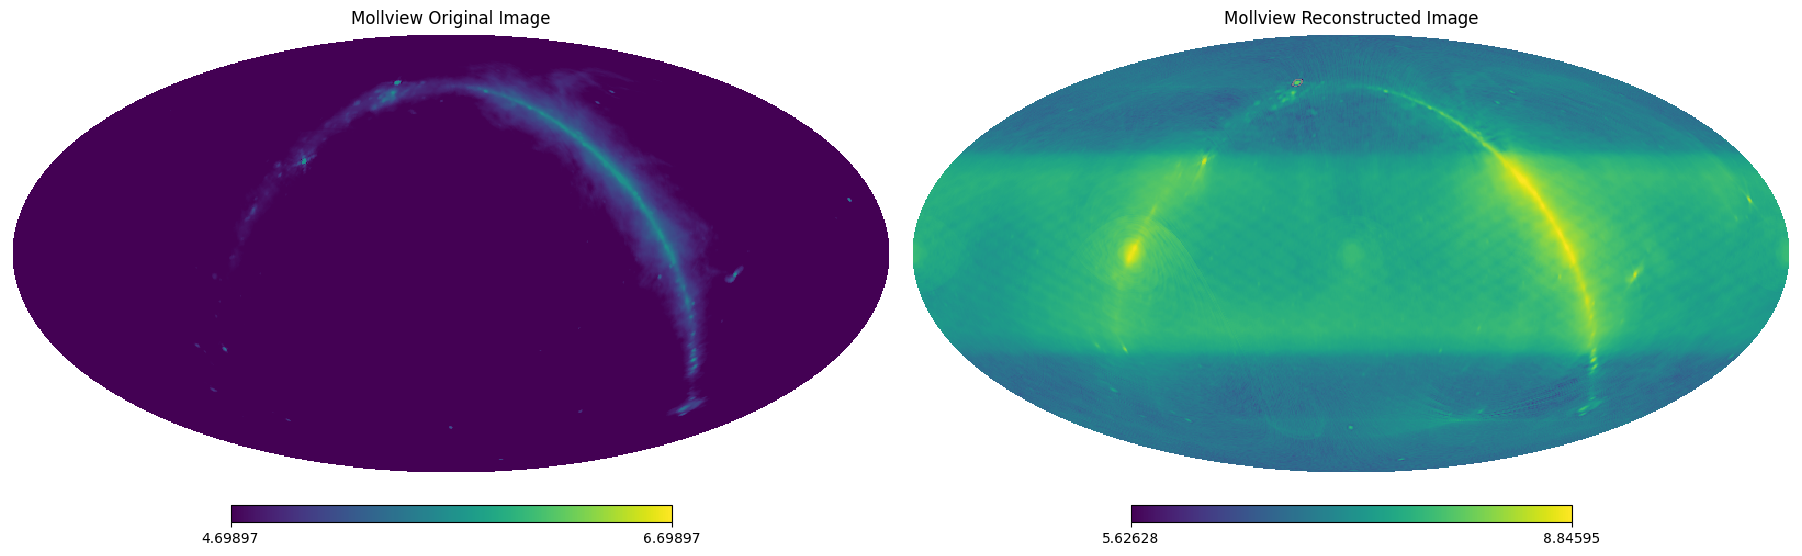

In [5]:
original_image_log = np.log10(original_image)
reconstructed_image_log = np.log10(reconstructed_image)


fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_image_log,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
    min=11222,
)
axs[0].axis('off')

hp.mollview(
    reconstructed_image_log,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis'
)
axs[1].axis('off')

plt.show()

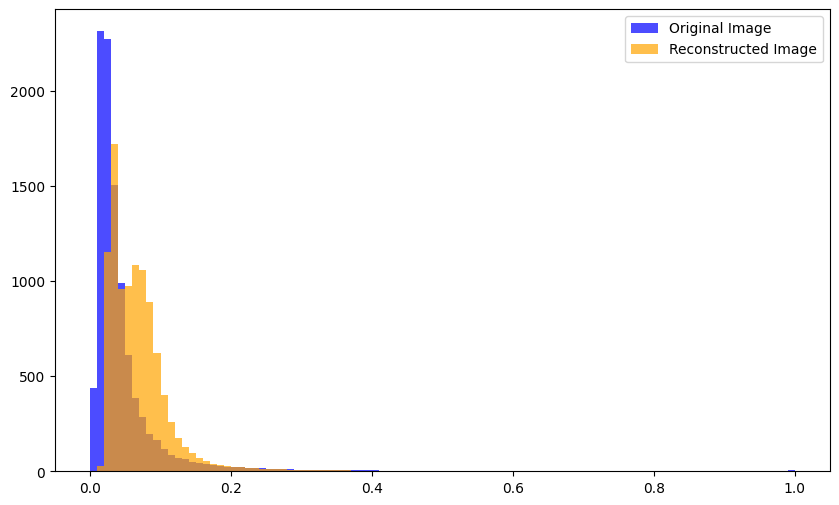

In [13]:
# 数据归一化到0-1范围
original_normalized = (original_image - np.min(original_image)) / (np.max(original_image) - np.min(original_image))
reconstructed_normalized = (reconstructed_image - np.min(reconstructed_image)) / (np.max(reconstructed_image) - np.min(reconstructed_image))

# 设置直方图的区间数量
bins = 100

# 计算每个区间的百分比
hist_original, edges_original = np.histogram(original_normalized, bins=bins, density=True)
hist_reconstructed, edges_reconstructed = np.histogram(reconstructed_normalized, bins=bins, density=True)

# 将密度转换为百分比
hist_original_percent = hist_original * 100
hist_reconstructed_percent = hist_reconstructed * 100

# 绘制归一化直方图
plt.figure(figsize=(10, 6))

# 绘制原始数据的直方图
plt.bar(
    (edges_original[:-1] + edges_original[1:]) / 2,
    hist_original_percent,
    width=(edges_original[1] - edges_original[0]),
    alpha=0.7,
    label='Original Image',
    color='blue'
)

# 绘制重建数据的直方图
plt.bar(
    (edges_reconstructed[:-1] + edges_reconstructed[1:]) / 2,
    hist_reconstructed_percent,
    width=(edges_reconstructed[1] - edges_reconstructed[0]),
    alpha=0.7,
    label='Reconstructed Image',
    color='orange'
)

plt.legend()

# 显示图表
plt.show()

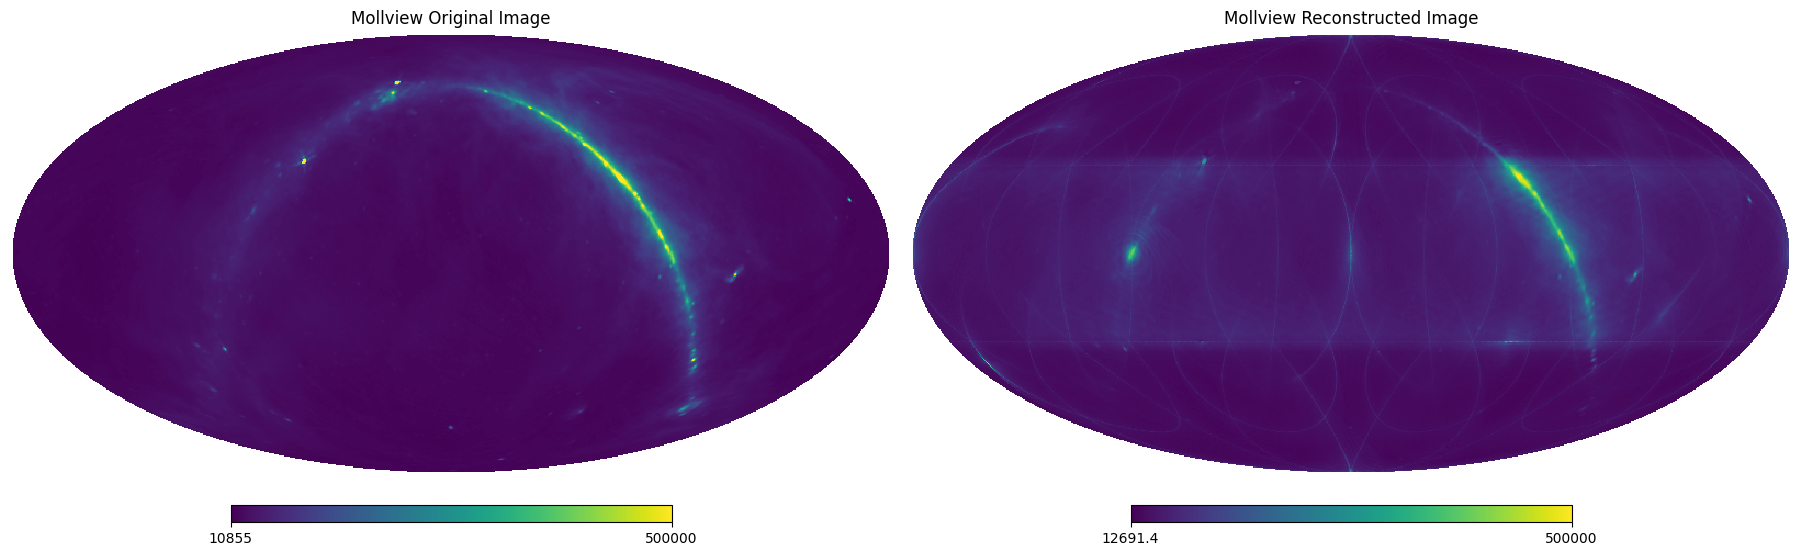

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_normalized * (np.max(original_image) - np.min(original_image)) + np.min(original_image),
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
)
axs[0].axis('off')

hp.mollview(
    reconstructed_normalized * (np.max(original_image) - np.min(original_image)) + np.min(original_image),
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
)
axs[1].axis('off')

plt.show()

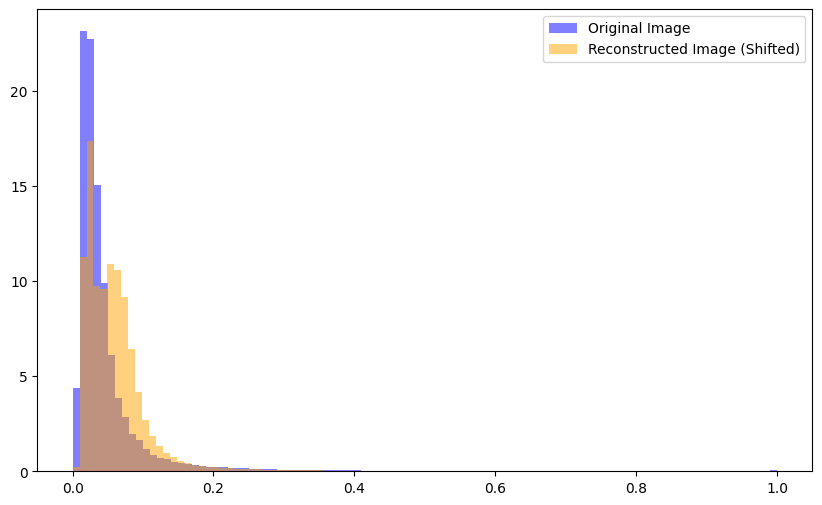

In [36]:
# 找到第18个bin的左边界
bin_18_left = edges_reconstructed[1]

# 将重构数据整体向左迁移，使得第18个bin及之后的数据移动到前面
reconstructed_shifted = reconstructed_normalized - bin_18_left

# 确保数据不小于0
reconstructed_shifted = np.clip(reconstructed_shifted, 0, 1)

# 绘制归一化直方图
plt.figure(figsize=(10, 6))

# 绘制原始数据的直方图
plt.hist(original_normalized, bins=bins, alpha=0.5, label='Original Image', color='blue', density=True)

# 绘制调整后的重构数据的直方图
plt.hist(reconstructed_shifted, bins=bins, alpha=0.5, label='Reconstructed Image (Shifted)', color='orange', density=True)

# 添加标题和标签
plt.legend()

# 显示图表
plt.show()

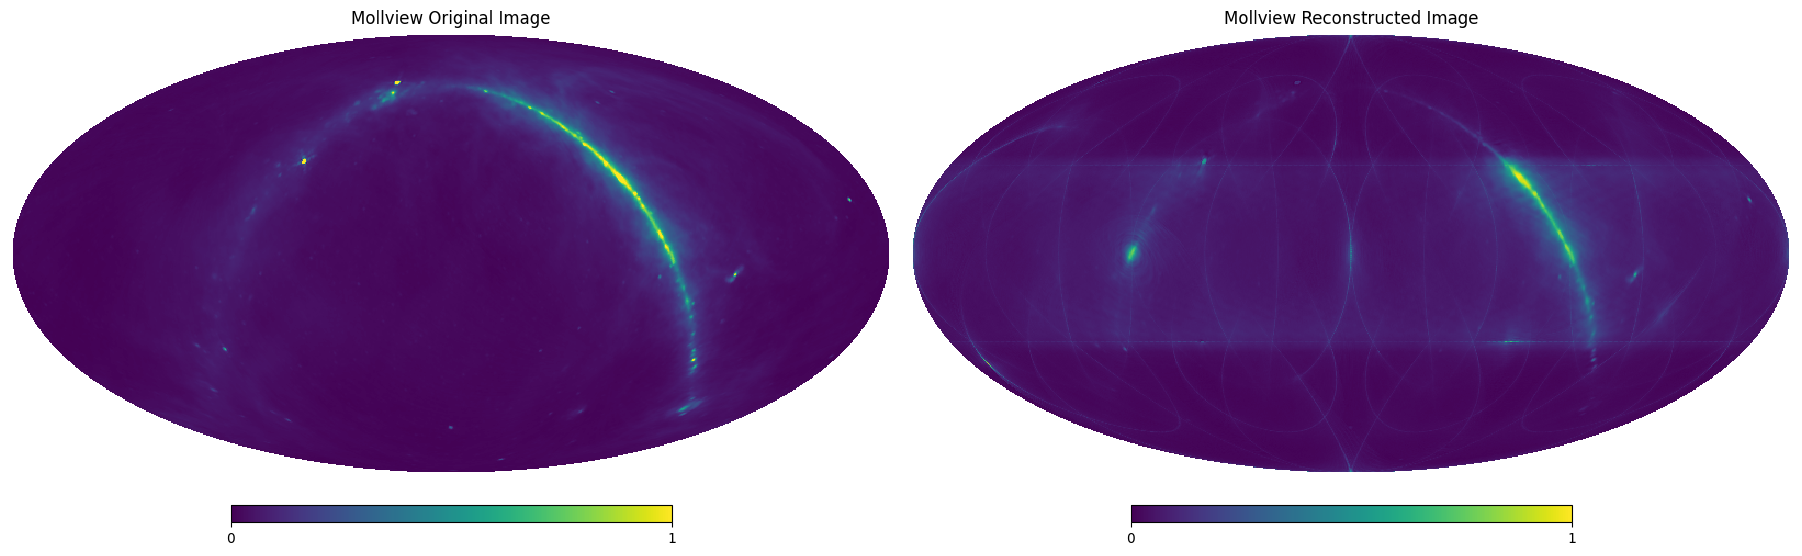

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_normalized,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
    min=0,
    max=1,
)
axs[0].axis('off')

hp.mollview(
    reconstructed_shifted,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
    min=0,  
    max=1,
)
axs[1].axis('off')

plt.show()

# 10M

In [2]:
NSIDE = 4096
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)

Approximate resolution at NSIDE 4096 is 0.014 deg


In [3]:
NPIX = hp.nside2npix(NSIDE)
print(NPIX)

201326592


In [4]:
original_mat_path = 'frequency_10M/B_10Mhz.txt'
# reconstructed_mat_path = 'F_recon_10M/sum_result_fromFF.txt'
original_image = np.loadtxt(original_mat_path)
# reconstructed_image = np.loadtxt(reconstructed_mat_path)

In [5]:
ori = original_image

In [6]:
ori.min(), ori.max()

(-208525.340459969, 500000.0)

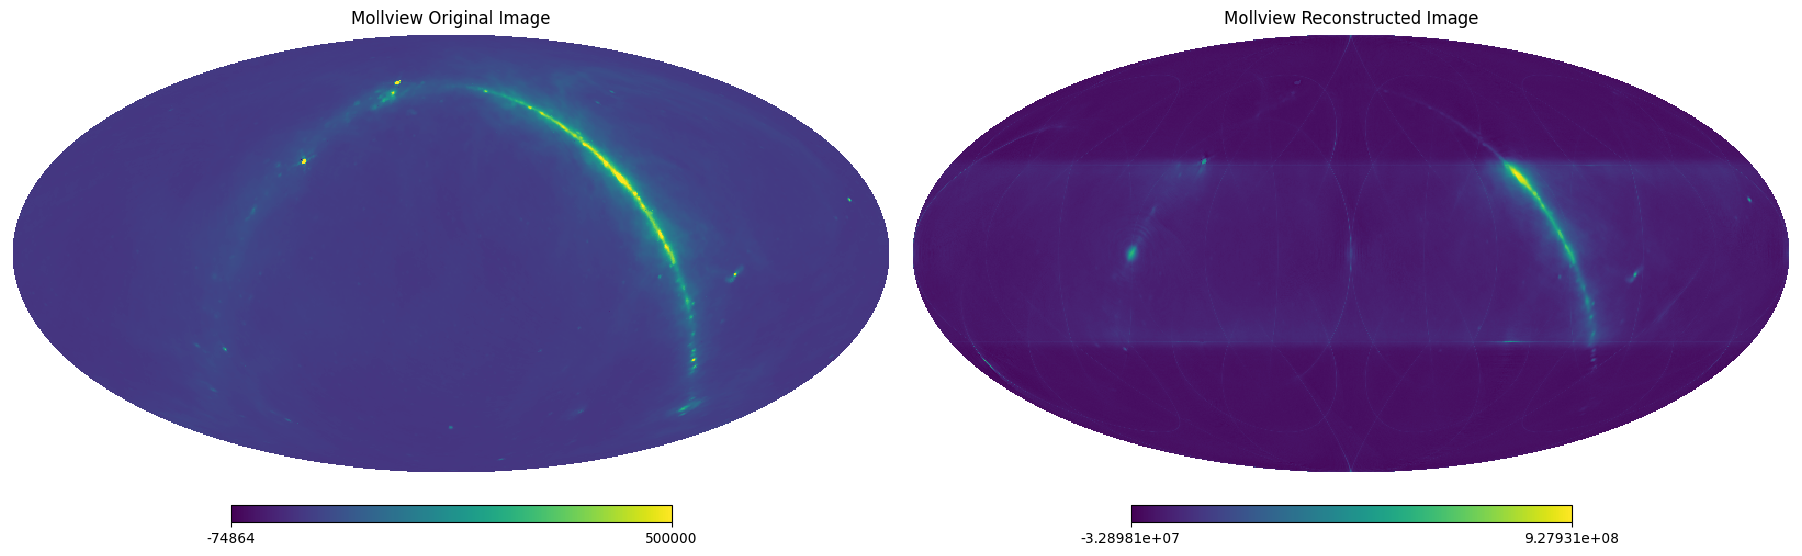

In [30]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_image,
    nest=True,
    title="Mollview Original Image",
    cmap='viridis',
    sub=(1, 2, 1),
)
axs[0].axis('off')

hp.mollview(
    reconstructed_image,
    nest=True,
    title="Mollview Reconstructed Image",
    cmap='viridis',
    sub=(1, 2, 2),
)
axs[1].axis('off')

plt.show()

In [12]:
ori[ori < 10855] = 10855

In [17]:
np.savetxt('frequency_10M/B_10Mhz_changeMin.txt', ori, fmt='%f', newline='\n')

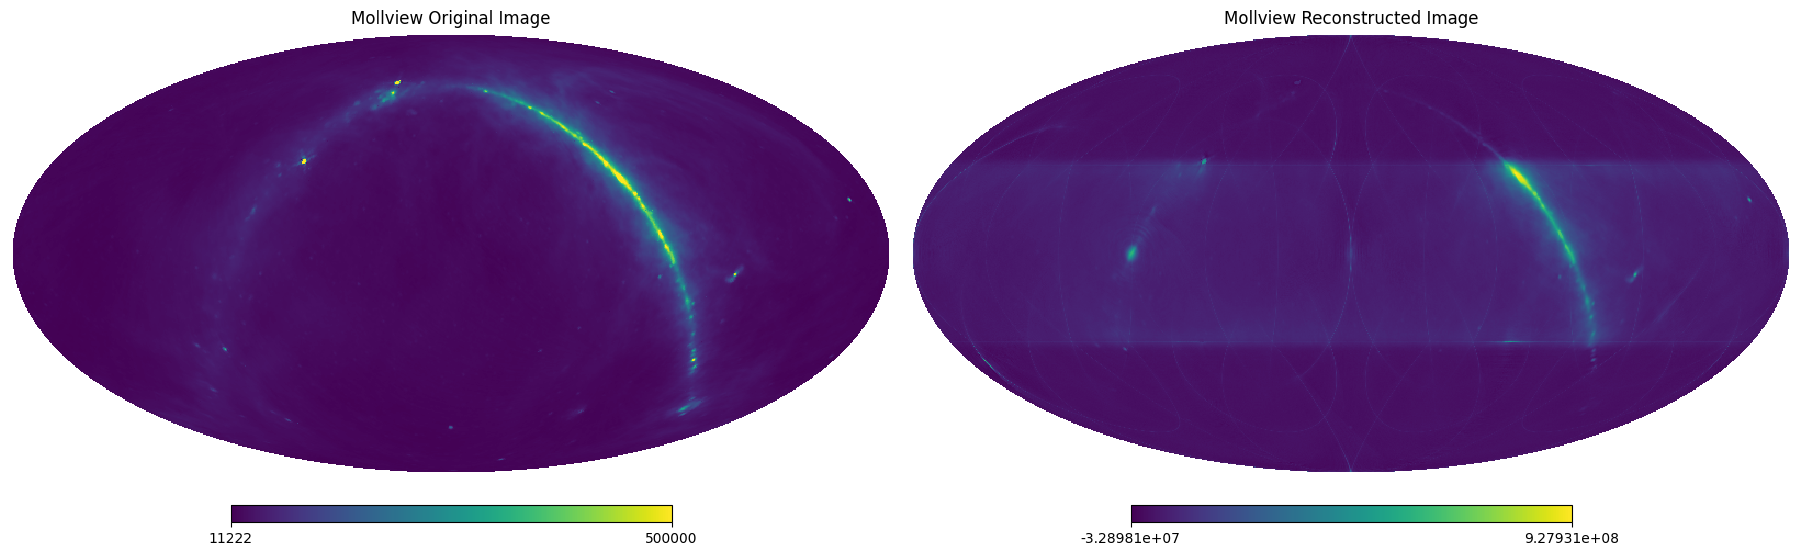

In [32]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    ori,
    nest=True,
    title="Mollview Original Image",
    cmap='viridis',
    sub=(1, 2, 1),
)
axs[0].axis('off')

hp.mollview(
    reconstructed_image,
    nest=True,
    title="Mollview Reconstructed Image",
    cmap='viridis',
    sub=(1, 2, 2),
)
axs[1].axis('off')

plt.show()

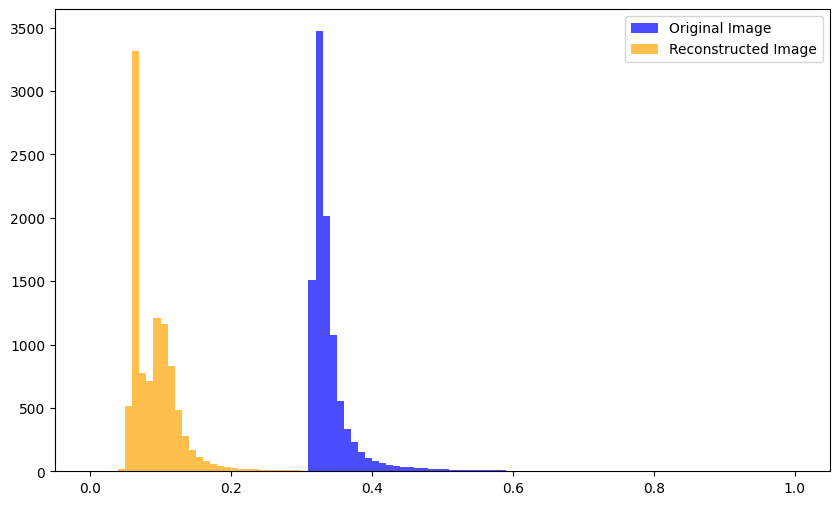

In [22]:
# 数据归一化到0-1范围
original_normalized = (original_image - np.min(original_image)) / (np.max(original_image) - np.min(original_image))
reconstructed_normalized = (reconstructed_image - np.min(reconstructed_image)) / (np.max(reconstructed_image) - np.min(reconstructed_image))

# 设置直方图的区间数量
bins = 100

# 计算每个区间的百分比
hist_original, edges_original = np.histogram(original_normalized, bins=bins, density=True)
hist_reconstructed, edges_reconstructed = np.histogram(reconstructed_normalized, bins=bins, density=True)

# 将密度转换为百分比
hist_original_percent = hist_original * 100
hist_reconstructed_percent = hist_reconstructed * 100

# 绘制归一化直方图
plt.figure(figsize=(10, 6))

# 绘制原始数据的直方图
plt.bar(
    (edges_original[:-1] + edges_original[1:]) / 2,
    hist_original_percent,
    width=(edges_original[1] - edges_original[0]),
    alpha=0.7,
    label='Original Image',
    color='blue'
)

# 绘制重建数据的直方图
plt.bar(
    (edges_reconstructed[:-1] + edges_reconstructed[1:]) / 2,
    hist_reconstructed_percent,
    width=(edges_reconstructed[1] - edges_reconstructed[0]),
    alpha=0.7,
    label='Reconstructed Image',
    color='orange'
)

plt.legend()

# 显示图表
plt.show()

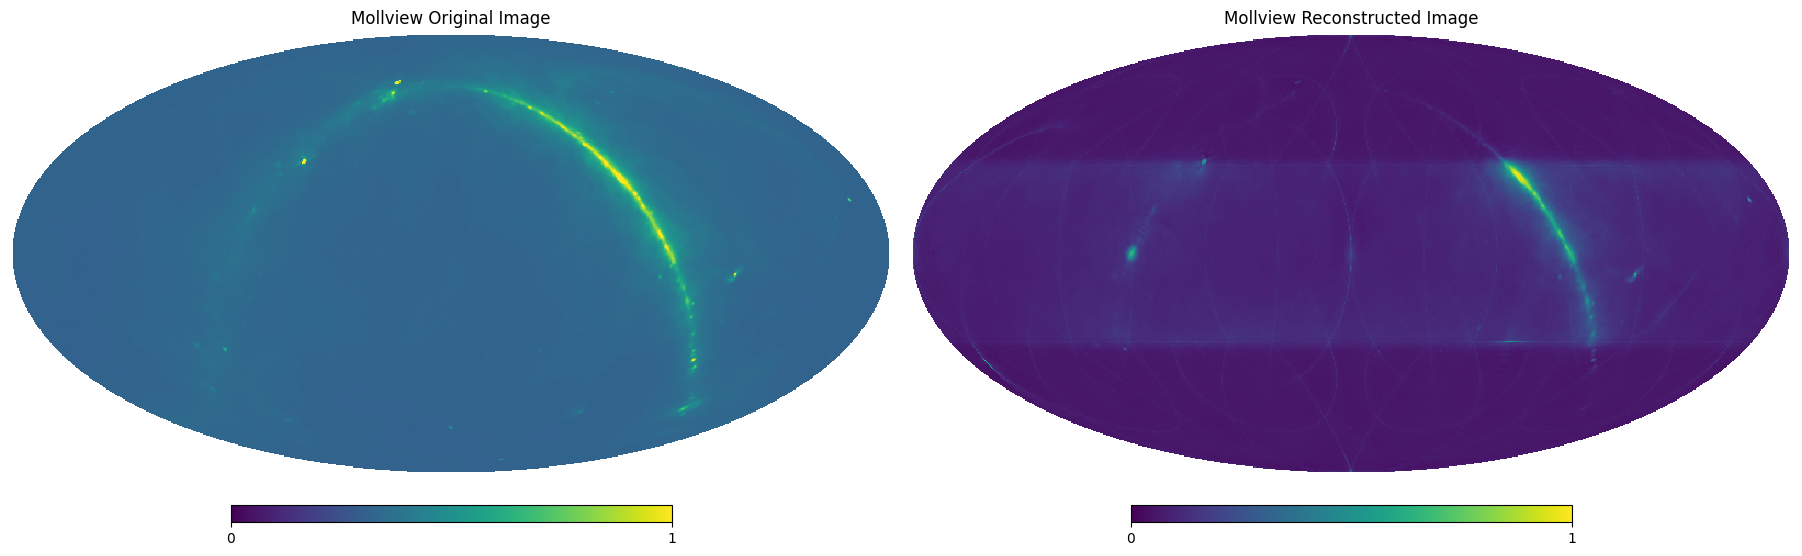

In [28]:

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_normalized,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    min=0,
    max=1,
)
axs[0].axis('off')

hp.mollview(
    reconstructed_normalized,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    min=0,
    max=1,
)
axs[1].axis('off')

plt.show()

/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-657

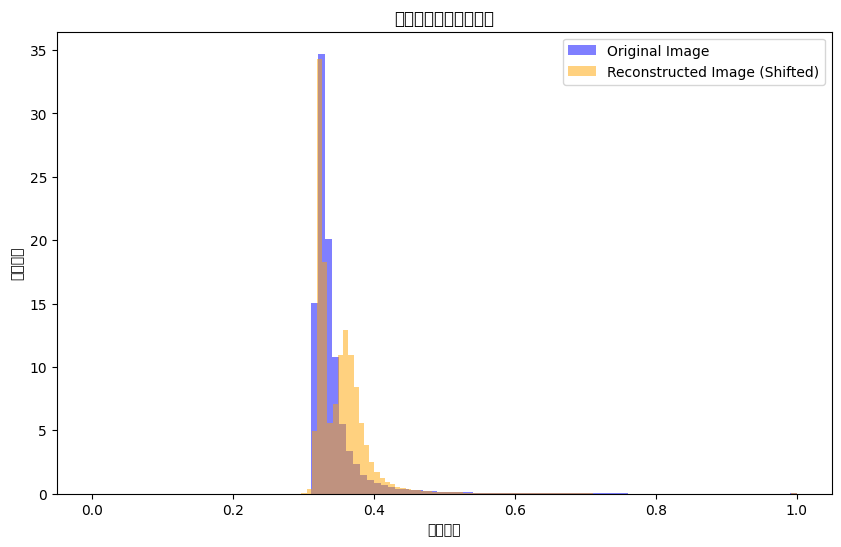

In [29]:
# 找到original_image第31个bin的左边界
original_bin_31_left = edges_original[30]

# 找到reconstructed_image第12个bin的左边界
reconstructed_bin_12_left = edges_reconstructed[4]

# 计算偏移量
offset = original_bin_31_left - reconstructed_bin_12_left

# 将重构数据整体向左迁移
reconstructed_normalized_shifted = reconstructed_normalized + offset

# 确保数据不超出0到1的范围
reconstructed_normalized_shifted = np.clip(reconstructed_normalized_shifted, 0, 1)

# 绘制归一化直方图
plt.figure(figsize=(10, 6))

# 绘制原始数据的直方图
plt.hist(original_normalized, bins=bins, alpha=0.5, label='Original Image', color='blue', density=True)

# 绘制调整后的重构数据的直方图
plt.hist(reconstructed_normalized_shifted, bins=bins, alpha=0.5, label='Reconstructed Image (Shifted)', color='orange', density=True)

# 添加标题和标签
plt.title('数值分布的百分比比较')
plt.xlabel('数值大小')
plt.ylabel('概率密度')
plt.legend()

# 显示图表
plt.show()

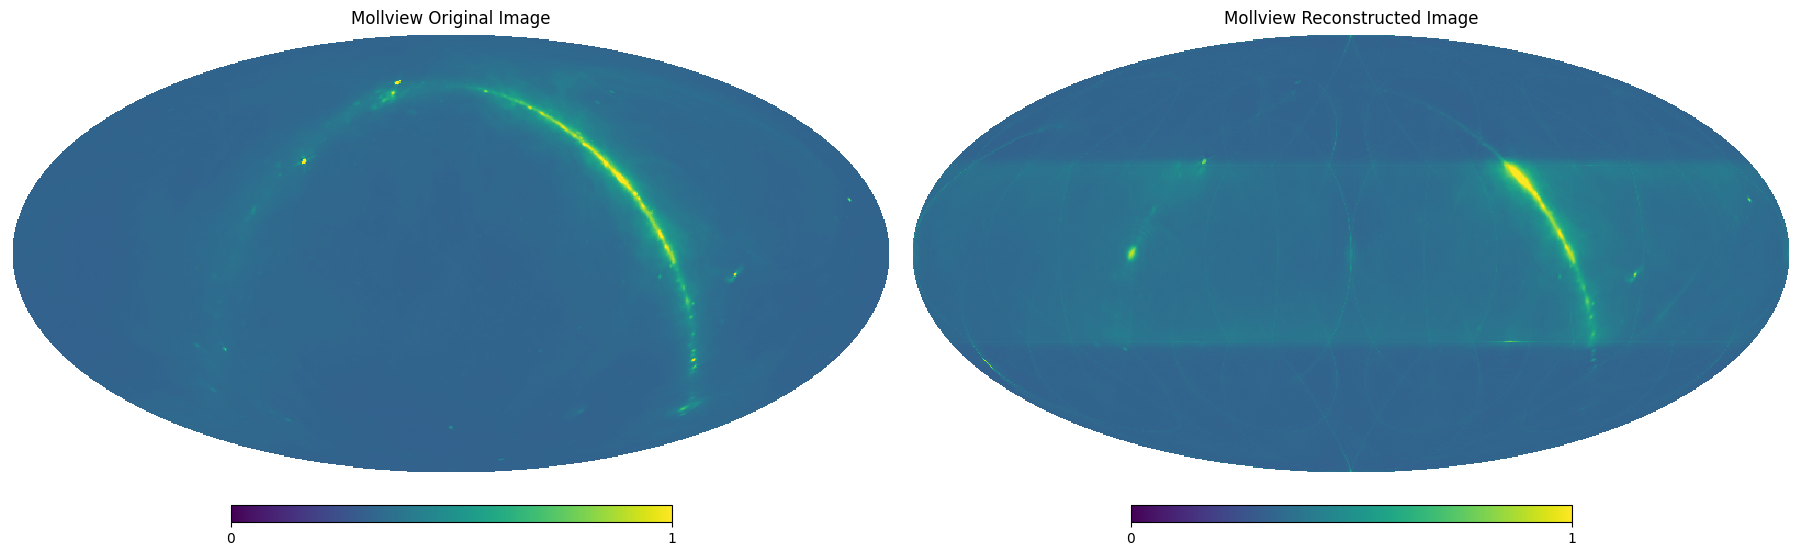

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

hp.mollview(
    original_normalized,
    nest=True,
    title="Mollview Original Image",
    sub=(1, 2, 1),
    cmap='viridis',
    min=0,
    max=1
)
axs[0].axis('off')

hp.mollview(
    reconstructed_normalized_shifted,
    nest=True,
    title="Mollview Reconstructed Image",
    sub=(1, 2, 2),
    cmap='viridis',
    min=0,
    max=1
)
axs[1].axis('off')

plt.show()